INTEGRANTES :


Giovanna Shiguemori Barbosa - RM: 99105

**Isabela Victória de Novais Romanato - RM: 550234**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
import scipy.stats .stats as stats
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
df_cities = pd.read_csv("/content/drive/MyDrive/datasets/Cities1.csv")
df_cities

,City,Region,Country,AirQuality,WaterPollution
0,New York City,New York,United States of America,46.816038,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143
2,San Francisco,California,United States of America,60.514019,43.000000
3,Berlin,NaN,Germany,62.364130,28.612717
4,Los Angeles,California,United States of America,36.621622,61.299435
...,...,...,...,...,...
3958,Yanbu,Medina Province,Saudi Arabia,0.000000,50.000000
3959,Cordoba,Andalusia,Spain,85.714286,8.333333
3960,Vic,Catalonia,Spain,100.000000,0.000000
3961,Segovia,Castile and Leon,Spain,100.000000,0.000000


In [ ]:
df_continents = pd.read_csv("/content/drive/MyDrive/datasets/continents.csv - Página2.csv")
df_continents

,Country,Continent
0,Egypt,Africa
1,Cote d'Ivoire,Africa
2,South Sudan,Africa
3,Tanzania,Africa
4,Sudan,Africa
...,...,...
172,Haiti,South America
173,Jamaica,South America
174,Dominican Republic,South America
175,Grenada,South America


In [ ]:
df_cities.isnull().sum()

City                0
Region            425
Country             0
AirQuality          0
WaterPollution      0
dtype: int64

In [ ]:
df_continents.isnull().sum()

Country      0
Continent    0
dtype: int64

In [ ]:
df_cities = df_cities.drop(columns=['City', 'Region'])

In [ ]:
df = pd.merge(df_cities, df_continents, on='Country')

In [ ]:
df.isnull().sum()

Country           0
AirQuality        0
WaterPollution    0
Continent         0
dtype: int64

In [ ]:
df

,Country,AirQuality,WaterPollution,Continent
0,United States of America,46.816038,49.504950,North America
1,United States of America,66.129032,49.107143,North America
2,United States of America,60.514019,43.000000,North America
3,United States of America,36.621622,61.299435,North America
4,United States of America,89.062500,46.153846,North America
...,...,...,...,...
3958,Eritrea,100.000000,25.000000,Africa
3959,Palau,100.000000,0.000000,Oceania
3960,Moldova,25.000000,75.000000,Europe
3961,Moldova,75.000000,75.000000,Europe


In [ ]:
df = pd.get_dummies(df, columns=['Continent'])
df

,Country,AirQuality,WaterPollution,Continent_Africa,Continent_Asia,Continent_Central America,Continent_Europe,Continent_Middle East,Continent_North America,Continent_Oceania,Continent_South America
0,United States of America,46.816038,49.504950,False,False,False,False,False,True,False,False
1,United States of America,66.129032,49.107143,False,False,False,False,False,True,False,False
2,United States of America,60.514019,43.000000,False,False,False,False,False,True,False,False
3,United States of America,36.621622,61.299435,False,False,False,False,False,True,False,False
4,United States of America,89.062500,46.153846,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3958,Eritrea,100.000000,25.000000,True,False,False,False,False,False,False,False
3959,Palau,100.000000,0.000000,False,False,False,False,False,False,True,False
3960,Moldova,25.000000,75.000000,False,False,False,True,False,False,False,False
3961,Moldova,75.000000,75.000000,False,False,False,True,False,False,False,False


In [ ]:
df['Continent_Africa'] = df['Continent_Africa'].apply(lambda x: 1 if x else 0)
df['Continent_Asia'] = df['Continent_Asia'].apply(lambda x: 1 if x else 0)
df['Continent_Central America'] = df['Continent_Central America'].apply(lambda x: 1 if x else 0)
df['Continent_Europe'] = df['Continent_Europe'].apply(lambda x: 1 if x else 0)
df['Continent_Middle East'] = df['Continent_Middle East'].apply(lambda x: 1 if x else 0)
df['Continent_North America'] = df['Continent_North America'].apply(lambda x: 1 if x else 0)
df['Continent_Oceania'] = df['Continent_Oceania'].apply(lambda x: 1 if x else 0)
df['Continent_South America'] = df['Continent_South America'].apply(lambda x: 1 if x else 0)

In [ ]:
df = df.drop(columns=['Country'])

In [ ]:
df

,AirQuality,WaterPollution,Continent_Africa,Continent_Asia,Continent_Central America,Continent_Europe,Continent_Middle East,Continent_North America,Continent_Oceania,Continent_South America
0,46.816038,49.504950,0,0,0,0,0,1,0,0
1,66.129032,49.107143,0,0,0,0,0,1,0,0
2,60.514019,43.000000,0,0,0,0,0,1,0,0
3,36.621622,61.299435,0,0,0,0,0,1,0,0
4,89.062500,46.153846,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
3958,100.000000,25.000000,1,0,0,0,0,0,0,0
3959,100.000000,0.000000,0,0,0,0,0,0,1,0
3960,25.000000,75.000000,0,0,0,1,0,0,0,0
3961,75.000000,75.000000,0,0,0,1,0,0,0,0


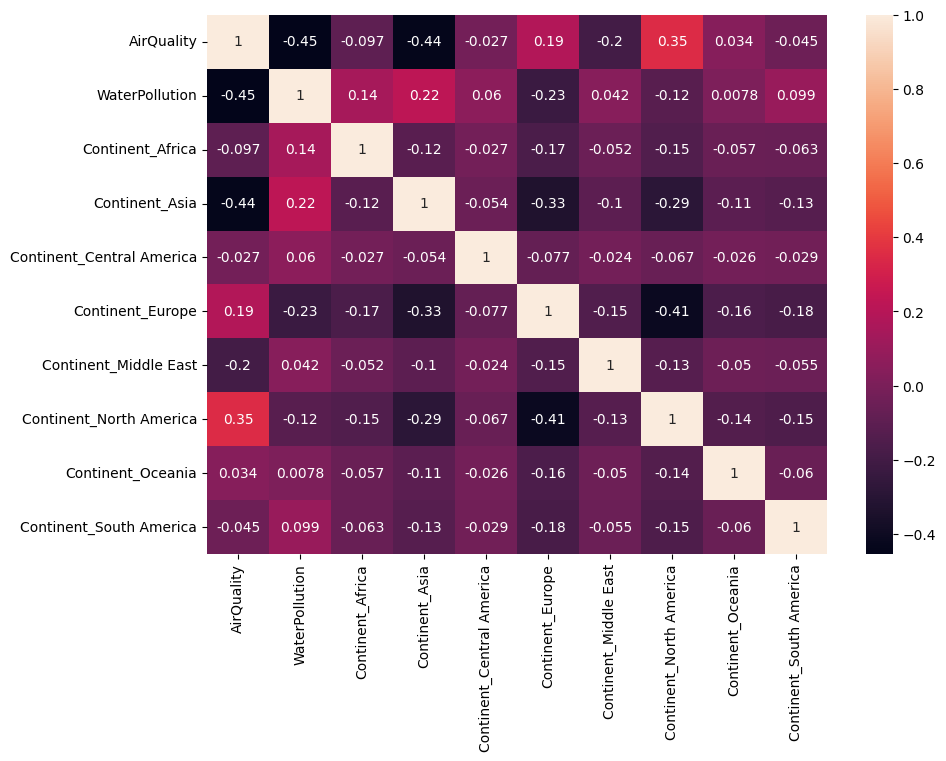

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
# Dividir os dados em treino e teste
from sklearn.model_selection import train_test_split

X = df[['AirQuality', 'Continent_Africa', 'Continent_Asia', 'Continent_Central America', 'Continent_Europe', 'Continent_Middle East', 'Continent_North America', 'Continent_Oceania', 'Continent_South America']]
y = df['WaterPollution']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Calcular o r² da base de treino
r_squared_train = model.score(X_train, y_train)

# Calcular o r² da base de teste
r_squared_test = model.score(X_test, y_test)

# Imprimir os resultados
print("R² da base de treino:", r_squared_train)
print("R² da base de teste:", r_squared_test)


R² da base de treino: 0.2466578073886535
R² da base de teste: 0.23337253066401153


In [ ]:
# Dividir os dados em treino e teste
X = df[['AirQuality', 'Continent_Africa', 'Continent_Asia', 'Continent_Central America', 'Continent_Europe', 'Continent_Middle East', 'Continent_North America', 'Continent_Oceania', 'Continent_South America']]
y = df['WaterPollution']

poly_features = PolynomialFeatures(degree=3, include_bias=False)

X_poly = poly_features.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Calcular o r² da base de treino
r_squared_train = model.score(X_train, y_train)

# Calcular o r² da base de teste
r_squared_test = model.score(X_test, y_test)

# Imprimir os resultados
print("R² da base de treino:", r_squared_train)
print("R² da base de teste:", r_squared_test)


R² da base de treino: 0.26971953405831406
R² da base de teste: 0.2596658051085454


In [ ]:
regressors = ['AirQuality', 'Continent_Africa', 'Continent_Asia', 'Continent_Central America', 'Continent_Europe', 'Continent_Middle East', 'Continent_North America', 'Continent_Oceania', 'Continent_South America']

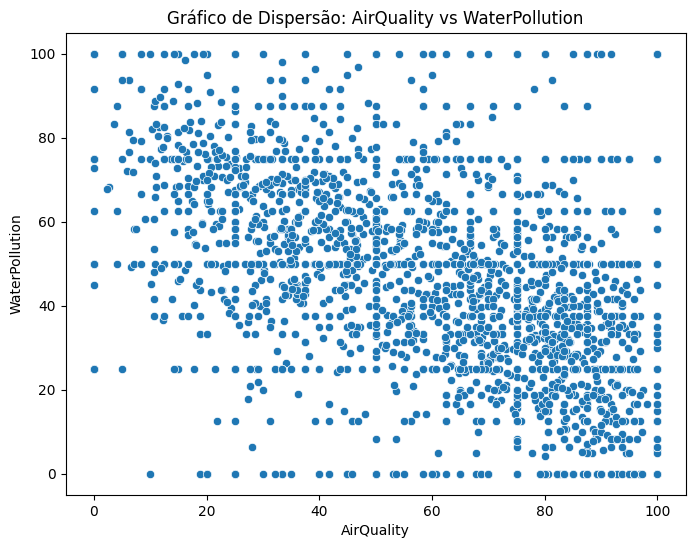

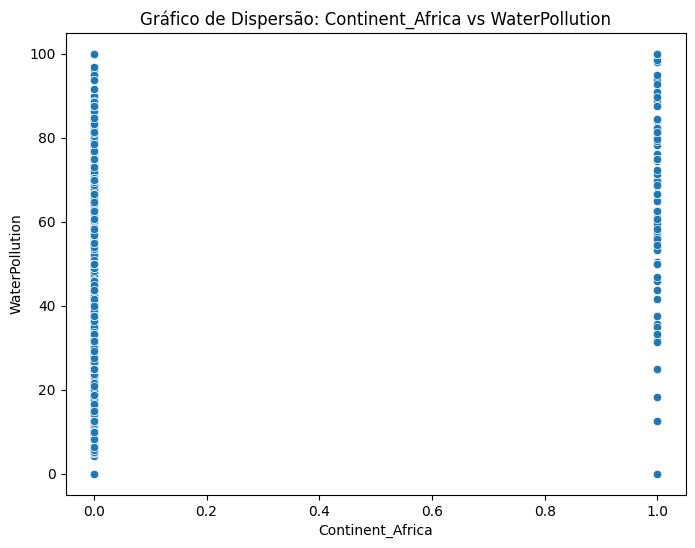

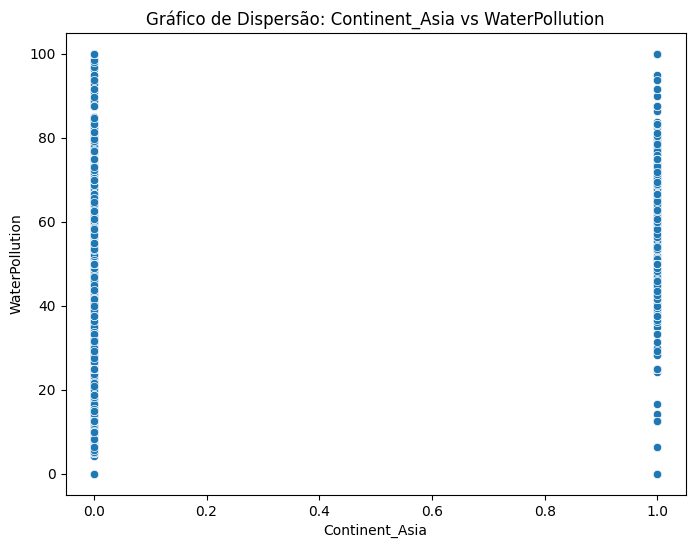

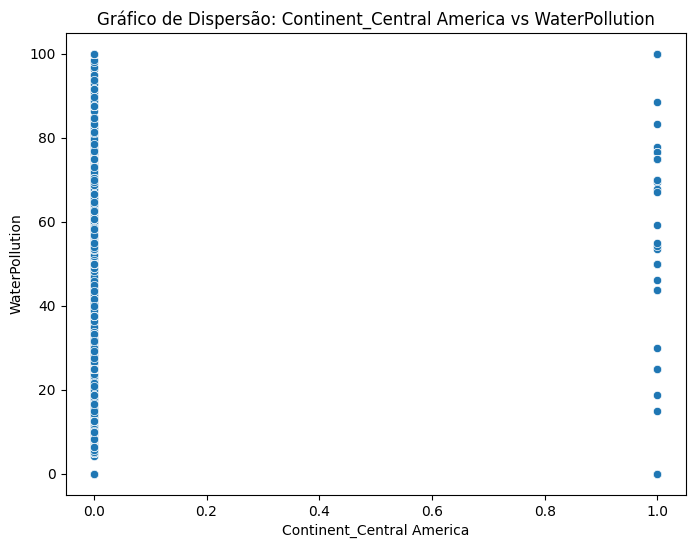

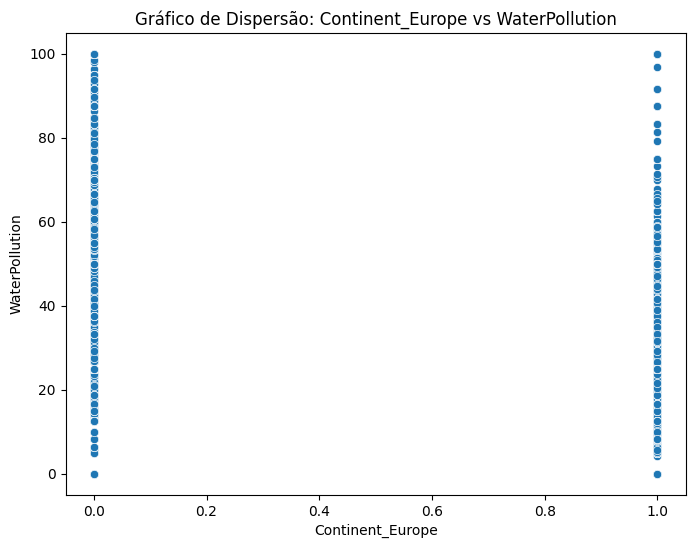

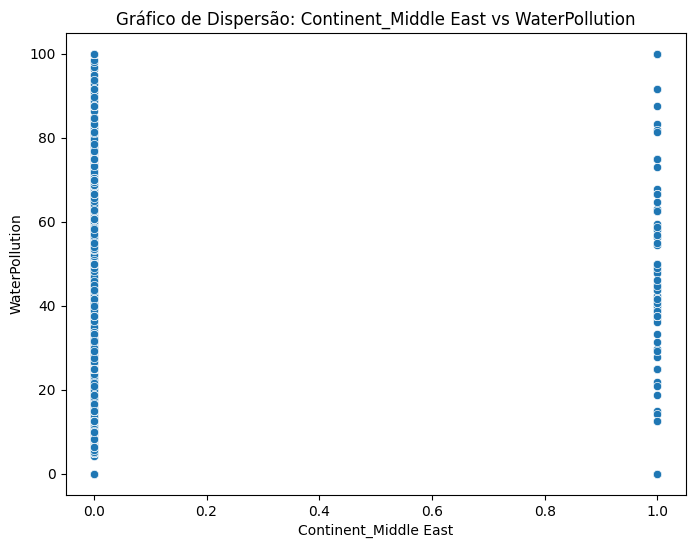

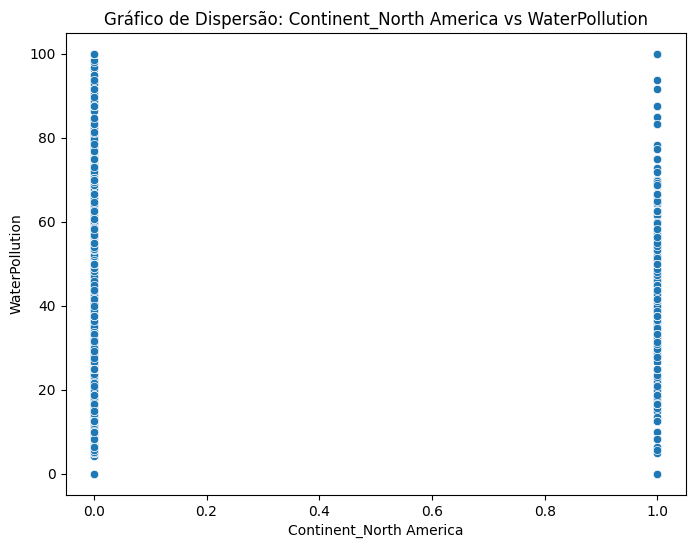

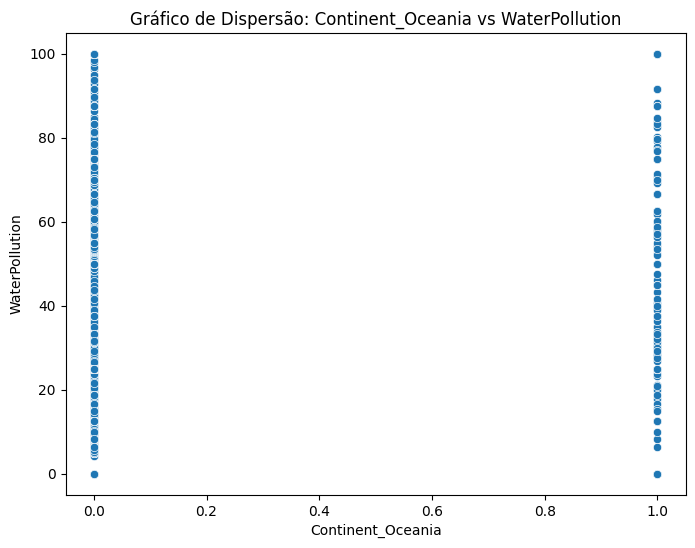

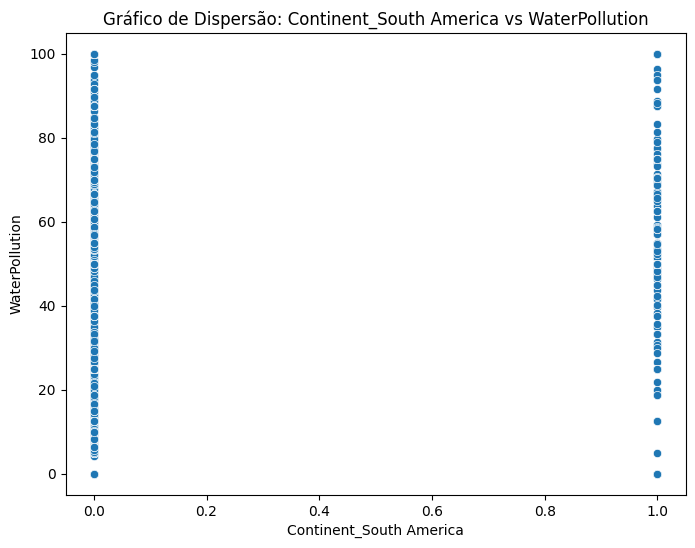

In [ ]:
for regressor in regressors:
    plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
    sns.scatterplot(x=df[regressor], y=df['WaterPollution'], data=df)  # Cria o gráfico de dispersão
    plt.xlabel(regressor)  # Define o rótulo do eixo x
    plt.ylabel('WaterPollution')  # Define o rótulo do eixo y
    plt.title(f'Gráfico de Dispersão: {regressor} vs WaterPollution')  # Define o título do gráfico
    plt.show()  # Exibe o gráfico

In [ ]:
model = sm.OLS(df['WaterPollution'], sm.add_constant(df[['AirQuality', 'Continent_Africa', 'Continent_Asia', 'Continent_Central America', 'Continent_Europe', 'Continent_Middle East', 'Continent_North America', 'Continent_Oceania', 'Continent_South America']])).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         WaterPollution   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     159.0
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          6.38e-233
Time:                        14:19:51   Log-Likelihood:                -17930.
No. Observations:                3963   AIC:                         3.588e+04
Df Residuals:                    3954   BIC:                         3.594e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        61.8144      0.862     71.709      0.000      60.124      63.504
AirQuality                   -0.3500      0.014    -25.102      0.000      -0.377      -0.323
Continent_Africa             15.4850      1.413     10.958      0.000      12.715      18.255
Continent_Asia                6.6419      0.910      7.296      0.000       4.857       8.427
Continent_Central America    15.9082      2.863      5.557      0.000      10.296      21.520
Continent_Europe             -1.0926      0.809     -1.350      0.177      -2.679       0.494
Continent_Middle East        -0.4195      1.599     -0.262      0.793      -3.555       2.716
Continent_North America       5.6911      0.905      6.290      0.000       3.917       7.465
Continent_Oceania             7.0775      1.491      4.746      0.000       4.154      10.001
Continent_South America      12.5228      1.354      9.251      0.000       9.869      15.177
==============================================================================
Omnibus:                       17.969   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.646
Skew:                           0.145   Prob(JB):                     0.000147
Kurtosis:                       2.850   Cond. No.                     1.01e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.86e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**6. Questão:** considerando um nível de significância de 10%, foi encontrada significância
estatística no coeficiente de algum regressor da regressão linear? Qual?


**Resposta:** Sim, **todos os regressores têm significância estatística** (AirQuality', 'Continent_Africa', 'Continent_Asia', 'Continent_Central America', 'Continent_Europe', 'Continent_Middle East', 'Continent_North America', 'Continent_Oceania', 'Continent_South America'), a um nível de significância de 10%, visto que os seus p-valores são todos inferiores a 0,10.



**7. Questão:** o que o cientista de dados deve entender quando não há significância
estatística no coeficiente de algum regressor?

**Resposta:** Quando um cientista de dados encontra um coeficiente de regressão sem significância estatística, ele deve compreender que a evidência não é forte o suficiente para rejeitar a hipótese nula de que o coeficiente é zero. Isso significa que, com base nos dados disponíveis, não há evidência suficiente para concluir que a variável independente (o regressor) tem um impacto real e significativo na variável dependente.




**8. Questão:** considerando um nível de significância de 10% o teste-f da regressão linear
rejeita ou aceita a hipótese nula? Lembrando que a hipótese nula estabelece que não
há diferença estatisticamente significativa no modelo usando-se somente o intercepto
e no modelo com os coeficientes calculados.


**Resposta:** O valor-p do teste F é 1.48e-195. O valor-p é menor que o nível de significância de 10%. Portanto, rejeitamos a hipótese nula. Isso significa que há uma diferença estatisticamente significativa entre o modelo usando apenas o intercepto e o modelo com os coeficientes calculados.

Se o valor-p for menor que 10%, isso significa que há menos de 10% de chance de observar os resultados obtidos se a hipótese nula fosse verdadeira. Portanto, rejeitamos a hipótese nula, concluindo que o modelo com os coeficientes calculados é significativamente melhor do que o modelo com apenas o intercepto.
Em outras palavras, o teste F fornece evidências suficientes para indicar que as variáveis independentes contribuem para explicar a variabilidade da variável dependente, rejeitando a ideia de que o modelo com apenas o intercepto é tão bom quanto o modelo completo.


**9. Bônus:** desconsiderando a significância estatística dos regressores, qual coeficiente
utilizado no modelo tem maior impacto para explicar a variável de interesse?

**Resposta:** Desconsiderando a significância estatística dos regressores o coeficiente utilizado no modelo que tem maior impacto para explicar a variável de interesse (WaterPollution), é Continent_Central America.